# **LIBRARIES**

In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer
import string,re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import euclidean, cityblock, cosine
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, string
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **Prepare the data**

In [2]:
df=pd.read_excel('/content/ai_human_content_detection_dataset.xlsx')

In [3]:
df.head(10)

,text_content,content_type,label
0,Score each cause. Quality throughout beautiful...,academic_paper,1
1,Board its rock. Job worker break tonight coupl...,essay,1
2,Way debate decision produce. Dream necessary c...,academic_paper,1
3,Story turn because such during open model. Tha...,creative_writing,1
4,Place specific as simply leader fall analysis....,news_article,1
5,Spend value return couple. Marriage method mat...,blog_post,1
6,Land region back nor article natural measure. ...,blog_post,1
7,Support feeling remain south trip. Include ind...,article,1
8,Some bad where learn during. Feel stock ball y...,article,1
9,Miss give best reveal laugh. Feel special boy ...,essay,1


In [4]:
def preprocess_text(text):
    text = str(text)
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in string.punctuation]
    words=[word.lower() for word in words]
    words = [w for w in words if re.match(r"^[a-z]+$", w)]
    stop_words = set(stopwords.words('english'))
    words=[w for w in words if w not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

In [5]:
df["processed_text"] = df["text_content"].apply(preprocess_text)


In [6]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["processed_text"])
tfidf_array = tfidf_matrix.toarray()
for i, doc in enumerate(df["processed_text"]):
    doc_tfidf = tfidf_array[i]
    tfidf_dict = {vectorizer.get_feature_names_out()[j]: doc_tfidf[j] for j in range(len(doc_tfidf))}
    for word, value in tfidf_dict.items():
        print(f"{word}: {value}")
    print()

Streaming output truncated to the last 5000 lines.
anyth: 0.0
appear: 0.0
appli: 0.06695212568067528
approach: 0.07068053501217132
area: 0.06767449364911181
argu: 0.0
arm: 0.0
around: 0.0
arriv: 0.0
art: 0.06945602272842087
articl: 0.06625221842368205
artist: 0.0
ask: 0.0
assum: 0.0
attack: 0.06671639713843952
attent: 0.0
attorney: 0.0
audienc: 0.0
author: 0.05507649573348094
avail: 0.0
avoid: 0.0
away: 0.0
babi: 0.0
back: 0.0
bad: 0.0
bag: 0.06816927994177967
ball: 0.0
bank: 0.0
bar: 0.06804456012091523
base: 0.0
beat: 0.06755247779438901
beauti: 0.0
becom: 0.0
bed: 0.0
begin: 0.07197550431821165
behavior: 0.0
behind: 0.0
believ: 0.0
benefit: 0.06893246726878942
best: 0.0
better: 0.0
beyond: 0.0
big: 0.06502297725217444
bill: 0.06659945209578573
billion: 0.0
bit: 0.0
black: 0.06546224719097242
blood: 0.0
blue: 0.0
board: 0.0
bodi: 0.06932398792127428
book: 0.0
born: 0.0
box: 0.0
boy: 0.0
break: 0.06880345906424018
bring: 0.0
brother: 0.0
budget: 0.13917767301297387
build: 0.0
busi: 0.

# **Top 10 words**

In [7]:
X=tfidf_matrix
y=df["label"]
clf = LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear")
clf.fit(X, y)

terms = np.array(vectorizer.get_feature_names_out())
coef = clf.coef_[0]

# Top 10 AI-indicative words (positive weights)
top_ai_idx = np.argsort(coef)[-10:][::-1]
top_ai = terms[top_ai_idx]
top_ai_weights = coef[top_ai_idx]

# Top 10 Human-indicative words (negative weights)
top_hum_idx = np.argsort(coef)[:10]
top_hum = terms[top_hum_idx]
top_hum_weights = coef[top_hum_idx]

print("=== Top AI Keywords ===")
for word, w in zip(top_ai, top_ai_weights):
    print(f"{word}: {w:.4f}")

print("\n=== Top Human Keywords ===")
for word, w in zip(top_hum, top_hum_weights):
    print(f"{word}: {w:.4f}")


=== Top AI Keywords ===
lawyer: 1.1638
collect: 1.0946
chanc: 1.0343
hear: 1.0089
end: 1.0057
inde: 1.0027
choic: 1.0021
also: 0.9975
know: 0.9896
candid: 0.9852

=== Top Human Keywords ===
hope: -1.3338
grow: -1.1217
analysi: -1.1193
alon: -1.1157
attent: -1.0934
abl: -1.0716
explain: -0.9648
train: -0.9115
push: -0.9043
network: -0.8742


# **Graph For top 50**

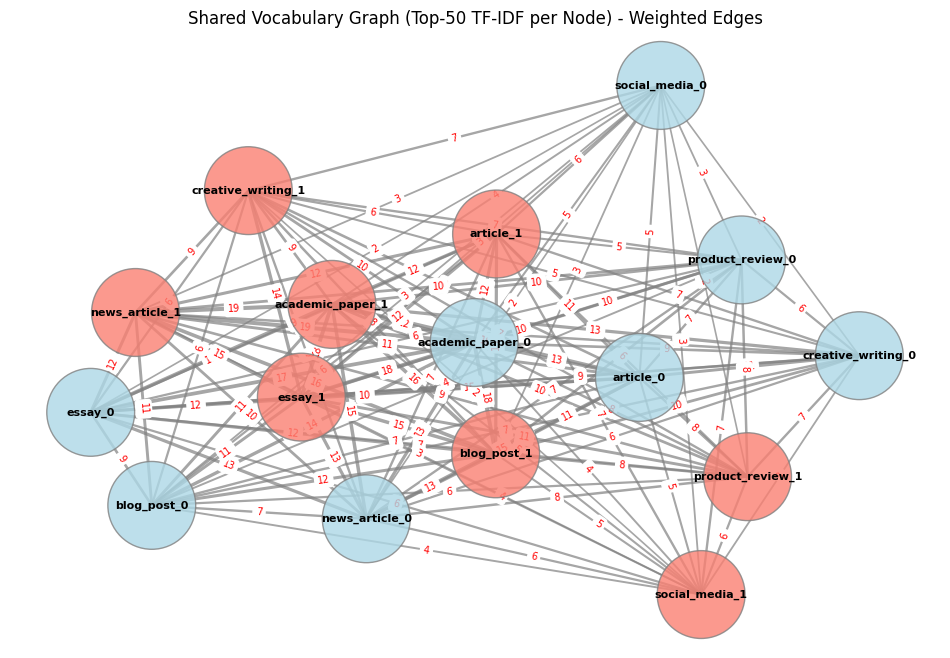

=== Edge Weights (Shared Keywords) ===
academic_paper_0 -- academic_paper_1: 22 shared keywords
academic_paper_0 -- essay_0: 17 shared keywords
academic_paper_0 -- essay_1: 18 shared keywords
academic_paper_0 -- creative_writing_0: 9 shared keywords
academic_paper_0 -- creative_writing_1: 10 shared keywords
academic_paper_0 -- news_article_0: 13 shared keywords
academic_paper_0 -- news_article_1: 19 shared keywords
academic_paper_0 -- blog_post_0: 14 shared keywords
academic_paper_0 -- blog_post_1: 18 shared keywords
academic_paper_0 -- article_0: 13 shared keywords
academic_paper_0 -- article_1: 12 shared keywords
academic_paper_0 -- social_media_0: 5 shared keywords
academic_paper_0 -- social_media_1: 4 shared keywords
academic_paper_0 -- product_review_0: 10 shared keywords
academic_paper_0 -- product_review_1: 8 shared keywords
academic_paper_1 -- essay_0: 17 shared keywords
academic_paper_1 -- essay_1: 18 shared keywords
academic_paper_1 -- creative_writing_0: 13 shared keywords
a

In [8]:
def top50(ct, lb):
    m = ((df["content_type"] == ct) & (df["label"] == lb)).to_numpy()
    if m.sum() == 0: return set()
    mean_vec = np.asarray(X[m].mean(axis=0)).ravel()
    idx = np.argsort(mean_vec)[-min(50, (mean_vec>0).sum() or 1):]
    return set(terms[idx])

G = nx.Graph()
nodes = []
for ct in df["content_type"].unique():
    for lb in [0, 1]:
        kws = top50(ct, lb)
        if not kws: continue
        name = f"{ct}_{lb}"
        G.add_node(name, label=lb, keywords=kws)
        nodes.append(name)

for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        a, b = nodes[i], nodes[j]
        shared = G.nodes[a]["keywords"] & G.nodes[b]["keywords"]
        if shared:
            G.add_edge(a, b, weight=len(shared))

pos = nx.spring_layout(G, seed=42)
colors = ["salmon" if G.nodes[n]["label"]==1 else "lightblue" for n in G.nodes()]

widths = [1 + 0.1 * G[u][v]["weight"] for u, v in G.edges()]

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=4000, edgecolors="gray", alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

nx.draw_networkx_edges(G, pos, width=widths, alpha=0.7, edge_color="gray")

edge_labels = {(u, v): f"{G[u][v]['weight']}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, font_color="red")

plt.axis("off")
plt.title("Shared Vocabulary Graph (Top-50 TF-IDF per Node) - Weighted Edges")
plt.show()

print("=== Edge Weights (Shared Keywords) ===")
for u, v in G.edges():
    print(f"{u} -- {v}: {G[u][v]['weight']} shared keywords")

# **UMAP**

In [9]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)

X_dense = tfidf_matrix.toarray()
y_true  = df["label"].values
k = 2

dims = [10, 20, 30, 50, 100]
algorithms = {
    "KMeans": lambda X: KMeans(n_clusters=k, n_init=10, random_state=0).fit(X).labels_,
    "Agglomerative": lambda X: AgglomerativeClustering(n_clusters=k, linkage="ward").fit(X).labels_,
    "Birch": lambda X: Birch(n_clusters=k, threshold=0.5).fit(X).labels_,
}

In [10]:
def metrics_all(X, labels, y):
    sil = silhouette_score(X, labels)
    ch  = calinski_harabasz_score(X, labels)
    db  = davies_bouldin_score(X, labels)
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    return sil, ch, db, ari, nmi

In [12]:
rows = []
for d in dims:
    # UMAP base (d-D) -> scale
    reducer = umap.UMAP(n_components=d, random_state=0)
    X_umap  = reducer.fit_transform(X_dense)
    X_base  = StandardScaler().fit_transform(X_umap)

    for name, fit_fn in algorithms.items():
        labels = fit_fn(X_base)
        sil, ch, db, ari, nmi = metrics_all(X_base, labels, y_true)
        rows.append({
            "algo": name, "dim": d,
            "silhouette": sil,
            "calinski_harabasz": ch,
            "davies_bouldin": db,
            "ARI": ari,
            "NMI": nmi
        })
res_df = pd.DataFrame(rows)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [13]:
best_dim = {}
for algo in res_df["algo"].unique():
    block = res_df[res_df["algo"] == algo].copy()
    block.sort_values(by=["ARI", "silhouette"], ascending=[False, False], inplace=True)
    best_row = block.iloc[0]
    best_dim[algo] = int(best_row["dim"])

In [14]:
res_df = pd.DataFrame(rows).sort_values(
    by=["algo","ARI","silhouette"], ascending=[True, False, False]
)

print("\n=== Summary by algorithm (sorted by ARI then Silhouette) ===")
for algo in res_df["algo"].unique():
    block = res_df[res_df["algo"] == algo].copy()
    print(f"\n--- {algo} ---")
    print(block.drop(columns=["algo"]).to_string(index=False))


=== Summary by algorithm (sorted by ARI then Silhouette) ===

--- Agglomerative ---
 dim  silhouette  calinski_harabasz  davies_bouldin       ARI      NMI
  20    0.045815          59.446819        4.744215  0.001269 0.001467
  50    0.046614          64.661118        4.334378  0.000837 0.001246
  30    0.046993          62.062859        4.461419  0.000315 0.000808
 100    0.046105          64.546867        4.431457  0.000119 0.000623
  10    0.057800          79.983833        4.101573 -0.000719 0.000010

--- Birch ---
 dim  silhouette  calinski_harabasz  davies_bouldin       ARI      NMI
  50    0.041064          58.160770        4.050119  0.001455 0.002216
  20    0.045743          61.273533        4.550927  0.001301 0.001542
 100    0.033515          57.675232        3.697459 -0.000180 0.000357
  10    0.069792          90.229256        3.160825 -0.000391 0.000151
  30    0.046502          61.538609        4.644277 -0.000528 0.000141

--- KMeans ---
 dim  silhouette  calinski_harab

In [15]:
umap2 = umap.UMAP(n_components=2, random_state=0)
X_umap2 = umap2.fit_transform(X_dense)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
pred_labels = {}

for algo, dim in best_dim.items():
    reducer_best = umap.UMAP(n_components=dim, random_state=0)
    X_umap_best  = reducer_best.fit_transform(X_dense)
    X_best       = StandardScaler().fit_transform(X_umap_best)

    if algo == "KMeans":
        pred = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X_best).labels_
    elif algo == "Agglomerative":
        pred = AgglomerativeClustering(n_clusters=k, linkage="ward").fit(X_best).labels_
    elif algo == "Birch":
        pred = Birch(n_clusters=k, threshold=0.5).fit(X_best).labels_

    pred_labels[algo] = pred


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


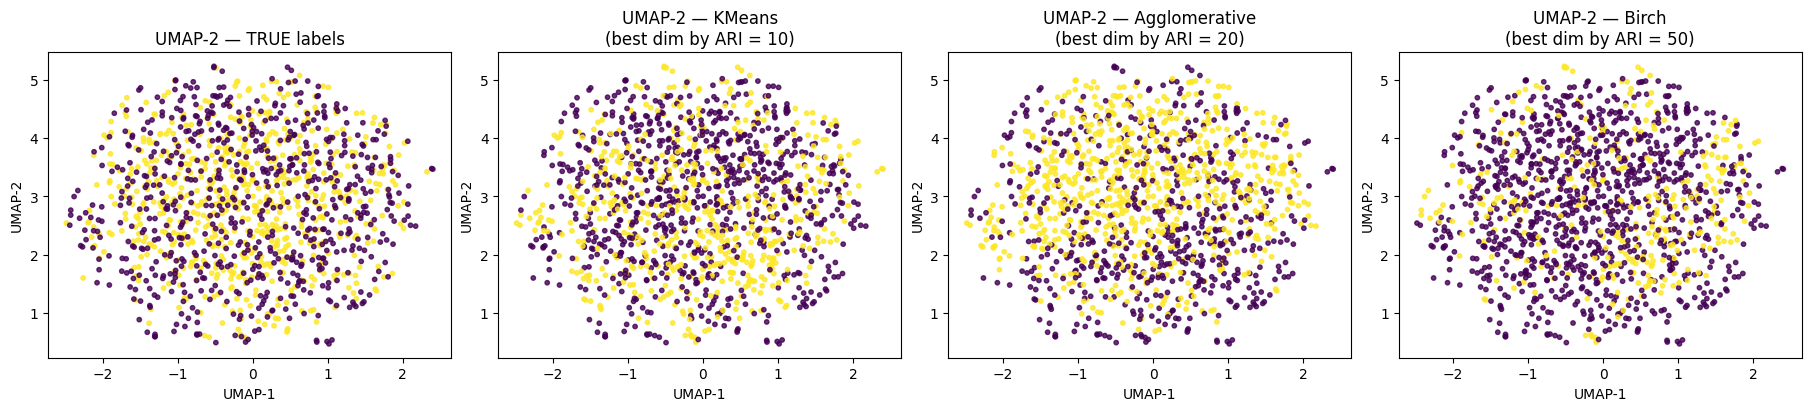

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4), constrained_layout=True)

axes[0].scatter(X_umap2[:,0], X_umap2[:,1], c=y_true, s=10, alpha=0.8)
axes[0].set_title("UMAP-2 — TRUE labels"); axes[0].set_xlabel("UMAP-1"); axes[0].set_ylabel("UMAP-2")

for ax, (algo, labels) in zip(axes[1:], pred_labels.items()):
    ax.scatter(X_umap2[:,0], X_umap2[:,1], c=labels, s=10, alpha=0.8)
    ax.set_title(f"UMAP-2 — {algo}\n(best dim by ARI = {best_dim[algo]})")
    ax.set_xlabel("UMAP-1"); ax.set_ylabel("UMAP-2")

plt.show()

# **PCA**

In [19]:
rows = []
for d in dims:

    pca = PCA(n_components=d, random_state=0)
    X_pca = pca.fit_transform(X_dense)
    X_base = StandardScaler().fit_transform(X_pca)

    for name, fit_fn in algorithms.items():
        labels = fit_fn(X_base)
        sil, ch, db, ari, nmi = metrics_all(X_base, labels, y_true)
        rows.append({
            "algo": name, "dim": d,
            "silhouette": sil,
            "calinski_harabasz": ch,
            "davies_bouldin": db,
            "ARI": ari,
            "NMI": nmi
        })

In [20]:
res_df = pd.DataFrame(rows).sort_values(
    by=["algo","ARI","silhouette"], ascending=[True, False, False]
)

print("\n=== Summary by algorithm (sorted by ARI then Silhouette) ===")
for algo in res_df["algo"].unique():
    block = res_df[res_df["algo"] == algo].copy()
    print(f"\n--- {algo} ---")
    print(block.drop(columns=["algo"]).to_string(index=False))


=== Summary by algorithm (sorted by ARI then Silhouette) ===

--- Agglomerative ---
 dim  silhouette  calinski_harabasz  davies_bouldin       ARI          NMI
  30    0.017042          15.388038        9.306128  0.003329 2.959646e-03
  50    0.008214           9.149525       12.131730  0.000168 6.498694e-04
  10    0.048829          50.977945        4.907982 -0.000166 4.031265e-04
  20    0.032299          22.045698        5.392370 -0.000353 7.957109e-08
 100    0.017107           4.931813       14.577769 -0.000462 1.026474e-04

--- Birch ---
 dim  silhouette  calinski_harabasz  davies_bouldin       ARI          NMI
  30    0.017042          15.388038        9.306128  0.003329 2.959646e-03
  50    0.008214           9.149525       12.131730  0.000168 6.498694e-04
  20    0.032299          22.045698        5.392370 -0.000353 7.957109e-08
 100    0.017107           4.931813       14.577769 -0.000462 1.026474e-04
  10    0.032575          48.684252        5.068157 -0.000592 9.222938e-05


In [21]:
pca2 = PCA(n_components=2, random_state=0)
X_pca2 = pca2.fit_transform(X_dense)

In [22]:
pred_labels = {}
for algo, dim in best_dim.items():
    pca_best = PCA(n_components=dim, random_state=0)
    X_pca_best = pca_best.fit_transform(X_dense)
    X_best = StandardScaler().fit_transform(X_pca_best)
    if algo == "KMeans":
        pred = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X_best).labels_
    elif algo == "Agglomerative":
        pred = AgglomerativeClustering(n_clusters=k, linkage="ward").fit(X_best).labels_
    elif algo == "Birch":
        pred = Birch(n_clusters=k, threshold=0.5).fit(X_best).labels_
    pred_labels[algo] = pred

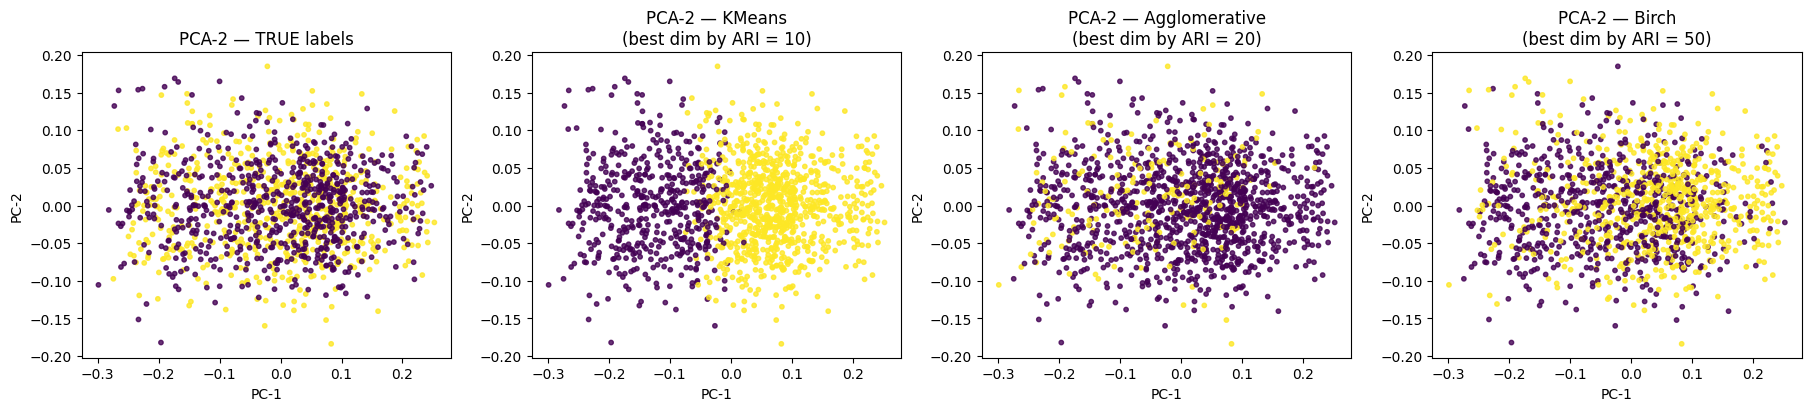

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4), constrained_layout=True)

axes[0].scatter(X_pca2[:,0], X_pca2[:,1], c=y_true, s=10, alpha=0.8)
axes[0].set_title("PCA-2 — TRUE labels"); axes[0].set_xlabel("PC-1"); axes[0].set_ylabel("PC-2")

for ax, (algo, labels) in zip(axes[1:], pred_labels.items()):
    ax.scatter(X_pca2[:,0], X_pca2[:,1], c=labels, s=10, alpha=0.8)
    ax.set_title(f"PCA-2 — {algo}\n(best dim by ARI = {best_dim[algo]})")
    ax.set_xlabel("PC-1"); ax.set_ylabel("PC-2")

plt.show()

# **USER INPUT**

In [ ]:
def classify_with_kmeans(new_text, vectorizer, pca_model, scaler,
                         kmeans_model, df, top_k=10, threshold=0.15):
    # -------- Vectorize + Reduce + Predict --------
    processed = preprocess_text(new_text)
    vec = vectorizer.transform([processed])
    vec_reduced = pca_model.transform(vec.toarray())
    vec_base    = scaler.transform(vec_reduced)

    cluster = int(kmeans_model.predict(vec_base)[0])
    print(f"\nAssigned Cluster: {cluster}")

    sims = cosine_similarity(vec, vectorizer.transform(df["processed_text"]))
    top_idx = sims[0].argsort()[::-1][:top_k]

    print("\nTop similar documents:")
    for i, idx in enumerate(top_idx, 1):
        ctype = df.iloc[idx]["content_type"]
        preview = df.iloc[idx]["text_content"][:80].replace("\n", " ")
        print(f"{i}. {ctype} | similarity={sims[0][idx]:.4f} | text='{preview}...'")

    best_content_type = df.iloc[top_idx[0]]["content_type"]
    print(f"\nPredicted Content Type: {best_content_type}")

    # -------- Build Star Graph (NEW  docs only) --------
    G = nx.Graph()
    new_node = "NEW"
    G.add_node(new_node, label="input_text")

    edges = []
    for idx in top_idx:
        doc_label = f"doc#{idx} | {df.iloc[idx]['content_type']}"
        G.add_node(doc_label, label=df.iloc[idx]["content_type"])
        sim_score = float(sims[0, idx])
        if sim_score >= threshold:
            G.add_edge(new_node, doc_label, weight=sim_score)
            edges.append({
                "Source": new_node,
                "Target": doc_label,
                "Weight": round(sim_score, 4)
            })

    edges_df = pd.DataFrame(edges)

    # -------- Centrality + PageRank --------
    deg_cent = nx.degree_centrality(G)
    bet_cent = nx.betweenness_centrality(G, weight="weight")
    clo_cent = nx.closeness_centrality(G)
    pagerank = nx.pagerank(G, weight="weight")

    metrics = []
    for node in G.nodes():
        metrics.append({
            "Node": node,
            "Label": G.nodes[node]["label"],
            "DegreeCentrality": round(deg_cent.get(node, 0.0), 4),
            "BetweennessCentrality": round(bet_cent.get(node, 0.0), 4),
            "ClosenessCentrality": round(clo_cent.get(node, 0.0), 4),
            "PageRank": round(pagerank.get(node, 0.0), 4)
        })
    metrics_df = pd.DataFrame(metrics).sort_values("PageRank", ascending=False)

    # -------- Draw Graph --------
    pos = nx.spring_layout(G, seed=42, k=0.8)
    plt.figure(figsize=(8, 8))

    node_colors = ["pink" if n == "NEW" else "yellow" for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=node_colors)
    nx.draw_networkx_labels(G, pos, font_size=9, font_color="black")

    nx.draw_networkx_edges(G, pos, width=2, edge_color="black")
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)},
        font_size=8
    )

    plt.title(f"Similarity Graph (NEW + top-{top_k})")
    plt.axis("off")
    plt.show()

    return cluster, best_content_type, metrics_df, edges_df




In [45]:
pca10   = PCA(n_components=10, random_state=0).fit(tfidf_matrix.toarray())
X_pca10 = pca10.transform(tfidf_matrix.toarray())

scaler  = StandardScaler().fit(X_pca10)
X_base  = scaler.transform(X_pca10)

kmeans = KMeans(n_clusters=2, n_init=20, random_state=0).fit(X_base)

Enter a text: All identify laugh security. Behind big soldier building article. Cup hundred rather visit. Old else spend against. Total kitchen can toward stop. Business walk anything under item right. Him interview government. Every land chance pass. Early far include nearly article evidence case current. Piece soon some writer site. Look sit general not focus establish. Five despite time. Speak line group once. Wind beyond prevent entire staff. Offer work home very yard.

Assigned Cluster: 0

Top similar documents:
1. news_article | similarity=0.8678 | text='All identify laugh security. Behind big soldier building article. Cup hundred ra...'
2. news_article | similarity=0.2416 | text='Try store later born. Prevent many majority section eight rather. Yard anything ...'
3. academic_paper | similarity=0.2178 | text='Box environmental need officer discussion hear. Structure western account once. ...'
4. academic_paper | similarity=0.2156 | text='Perhaps if every spring chance feeling tra

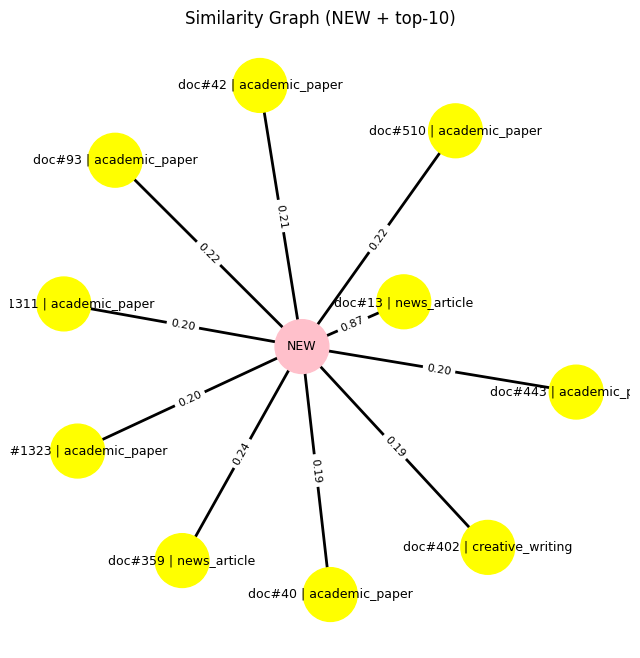


Cluster: 0
Predicted Content Type: news_article

=== Centrality & PageRank Results ===
                          Node             Label  DegreeCentrality  \
0                          NEW        input_text               1.0   
1        doc#13 | news_article      news_article               0.1   
2       doc#359 | news_article      news_article               0.1   
3      doc#93 | academic_paper    academic_paper               0.1   
4     doc#510 | academic_paper    academic_paper               0.1   
5      doc#42 | academic_paper    academic_paper               0.1   
6     doc#443 | academic_paper    academic_paper               0.1   
7    doc#1323 | academic_paper    academic_paper               0.1   
8    doc#1311 | academic_paper    academic_paper               0.1   
9      doc#40 | academic_paper    academic_paper               0.1   
10  doc#402 | creative_writing  creative_writing               0.1   

    BetweennessCentrality  ClosenessCentrality  PageRank  
0           

In [62]:
user_input = input("Enter a text: ")

cluster, content_type, metrics_df, edges_df = classify_with_kmeans(
    user_input,
    vectorizer=vectorizer,
    pca_model=pca10,
    scaler=scaler,
    kmeans_model=kmeans,
    df=df,
    top_k=10,
    threshold=0.15
)

print("\nCluster:", cluster)
print("Predicted Content Type:", content_type)

print("\n=== Centrality & PageRank Results ===")
print(metrics_df)

print("\n=== Edges (similarities >= threshold) ===")
print(edges_df)

